<h2>APCEMM Example 1: EPM</h2>

<p>This example demonstrates the early plume microphysics (EPM) module of APCEMM. In this particular example, the ambient relative humidity (w.r.t water) was set to 40% so  that the contrail does not persist. Therefore, the simulation ended early. To analyze only EPM results from a case where a contrail would persist, simply force-terminate the simulation when the console outputs "Time step: 1 out of N". </p>

<h4>EPM outputs a vector as a function of time in a csv format. The entries in this vector are:</h4>

Time (Index 0), Tracer (Ind. 1), Temperature (Ind. 2), Pressure (Ind. 3): Self-explanatory
    
H2O (Ind. 4): H2O concentration in molec/cm3
    
RH_i (Ind. 5), RH_w (Ind. 6): Relative humidity w.r.t. ice and water, respectively

SO4 (Ind. 7): Total SO4 concentration [molec/cm3]

SO4g (Ind. 8), SO4l (Ind. 9), SO4s (Ind. 10): Gaseous, liquid, and solid SO4 concentration respectively [molec/cm3]

SO4Sat (Ind. 11): SO4 saturation ratio

HNO3 (Ind. 12), HNO3Sat (Ind. 13): Analogous to SO4 and SO4Sat

Part (Ind. 14): Soot particle concentration [molec/cm3]

Rad (Ind. 15): Ice particle radius [um]

Theta1 (Ind. 16): Particle coating fraction due to adsorption

Theta2 (Ind. 17): Particle coating fraction due to scavenging

In [2]:
#Import relevant libraries for analyzing EPM output and take a look at the output vector
import pandas as pd
import numpy as np
import matplotlib.ticker
from matplotlib import pyplot as plt

df = pd.read_csv('APCEMM_out/Micro000000.out')
df = df.drop(index=0)
df[df.columns[0]] = df[df.columns[0]].values.astype(np.float64)
df.columns

Index(['    Time [s]', '   Tracer [-]', '    Temp. [K]', '   Pres. [Pa]',
       '   H2O [/cm3]', '     RH_i [-]', '     RH_w [-]', '   SO4 [/cm3]',
       '  SO4g [/cm3]', '  SO4l [/cm3]', '  SO4s [/cm3]', '   SO4Sat [-]',
       '  HNO3 [/cm3]', '   HNO3Sat[-]', '   Part[/cm3]', '     Rad[mum]',
       '    Theta1[-]', '    Theta2[-]', ' '],
      dtype='object')

[Text(0.5, 0, 'Time, s'), Text(0, 0.5, 'Temperature, K')]

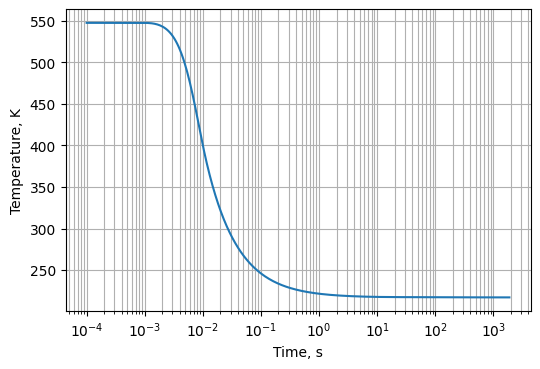

In [7]:
#Plotting Temperature (index 2) vs. Time (index 0)

fig, ax = plt.subplots(dpi=100)
ax.plot(df[df.columns[0]].values, df[df.columns[2]].values)
ax.set_xscale("log")
ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel="Temperature, K")

[Text(0.5, 0, 'Time, s'), Text(0, 0.5, 'Pressure, Pa')]

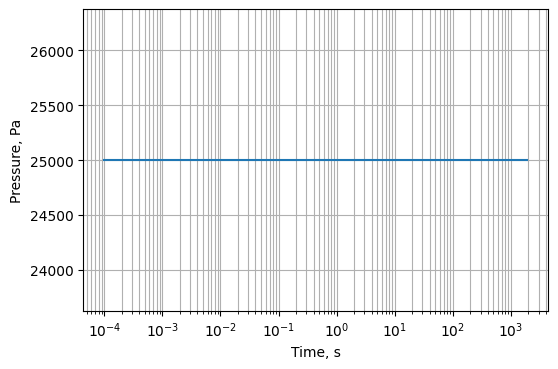

In [8]:
#Pressure vs. Time
fig, ax = plt.subplots(dpi=100)
ax.plot(df[df.columns[0]].values, df['   Pres. [Pa]'].values)
ax.set_xscale("log")
ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel="Pressure, Pa")

[Text(0.5, 0, 'Time, s'), Text(0, 0.5, 'H2O [/cm3]')]

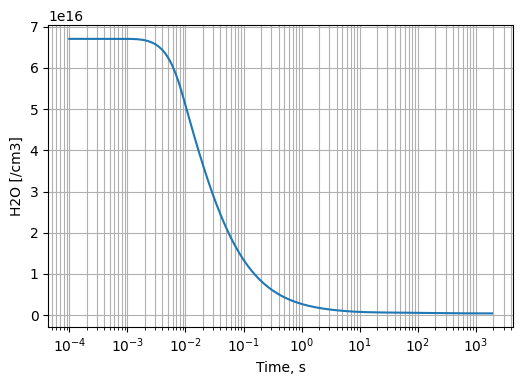

In [9]:
#H2O vs. Time
fig, ax = plt.subplots(dpi=100)
ax.plot(df[df.columns[0]].values, df['   H2O [/cm3]'].values)
ax.set_xscale("log")
ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel="H2O [/cm3]")

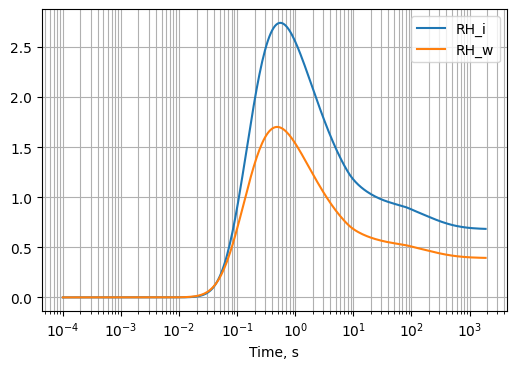

In [10]:
fig, ax = plt.subplots(dpi = 100)
ax.plot(df[df.columns[0]].values, df['     RH_i [-]'].values, label = 'RH_i')
ax.plot(df[df.columns[0]].values, df['     RH_w [-]'].values, label = 'RH_w')
ax.set_xscale("log")
ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel='')
ax.legend()

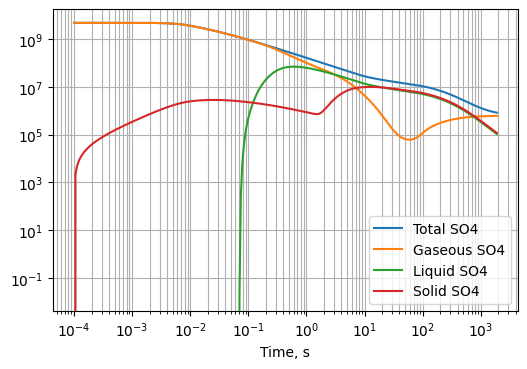

In [11]:
fig, ax = plt.subplots(dpi = 100)
ax.plot(df[df.columns[0]].values, df['   SO4 [/cm3]'].values, label = 'Total SO4')
ax.plot(df[df.columns[0]].values, df['  SO4g [/cm3]'].values, label = 'Gaseous SO4')
ax.plot(df[df.columns[0]].values, df['  SO4l [/cm3]'].values, label = 'Liquid SO4')
ax.plot(df[df.columns[0]].values, df['  SO4s [/cm3]'].values, label = 'Solid SO4')
ax.set_xscale("log")
ax.set_yscale("log")

ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel='')
ax.legend()

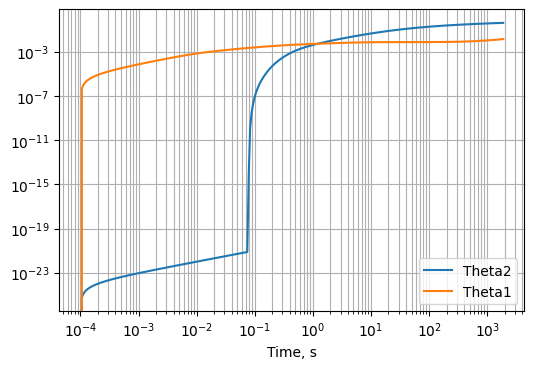

In [12]:
fig, ax = plt.subplots(dpi = 100)
ax.plot(df[df.columns[0]].values, df[df.columns[-2]].values, label = 'Theta2')
ax.plot(df[df.columns[0]].values, df[df.columns[-3]].values, label = 'Theta1')
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel='')
ax.legend()

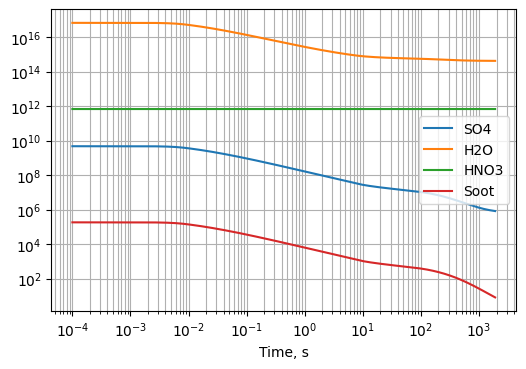

In [13]:
fig, ax = plt.subplots(dpi = 100)
ax.plot(df[df.columns[0]].values, df['   SO4 [/cm3]'].values, label = 'SO4')
ax.plot(df[df.columns[0]].values, df[df.columns[4]].values, label = 'H2O')
ax.plot(df[df.columns[0]].values, df[df.columns[12]].values, label = 'HNO3')
ax.plot(df[df.columns[0]].values, df[df.columns[14]].values, label = 'Soot')
ax.set_xscale("log")
ax.set_yscale("log")

ax.grid(True, which="both", ls='-')
ax.set(xlabel="Time, s", ylabel='')
ax.legend()

[Text(0.5, 0, 'Time, s'), Text(0, 0.5, 'Particle Radius (um)')]

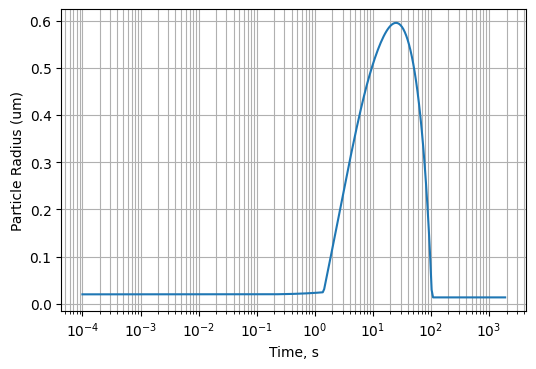

In [14]:
fig,ax = plt.subplots(dpi=100)
ax.plot(df[df.columns[0]].values, df['     Rad[mum]'].values)
ax.set_xscale('log')
ax.grid(True, which = 'both', ls='-')
ax.set(xlabel='Time, s', ylabel = 'Particle Radius (um)')